# Venue Matching Notes

I explore using a threshold score of 85 to match Ticketmaster venues to their SeatGeek and Stubhub counterparts,
with no noticeable difference in the number of venues matched

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
%matplotlib inline 

In [2]:
#Import Dataframes from Master Notebook
%store -r tm_df
%store -r sg_df
%store -r sh_df
%store -r sh_venue_score
%store -r sg_venue_score

In [3]:
def venue_match(row):
    
    #If an exact match exists of venue name, city, and state, return as 100% match
    mask =(tm1['TM_venue'] == row.iloc[0]) & (tm1['TM_venue_city'] == row.iloc[1]) & (tm1['TM_venue_state'] == row.iloc[2])
    if not (tm1.loc[mask]).empty:
        return row.iloc[0], row.iloc[0],'MATCH', 100
    
    #If there is not an exact match, look for a fuzzy match where city and state names match up
    else:
        new_name, score = process.extractOne(row.iloc[0], tm_venues)
        if score < 85 \
        or any(tm1['TM_venue_city'].loc[tm1['TM_venue'] == new_name] != row.iloc[1])\
        or any(tm1['TM_venue_state'].loc[tm1['TM_venue'] == new_name] != row.iloc[2]):
            return row.iloc[0], row.iloc[0],'NO MATCH',score
        else: 
            return new_name, row.iloc[0], 'MATCH',score

In [4]:
#Create DF of unique Ticketmaster venues,and their cities and states
tm1 = tm_df[['TM_venue','TM_venue_city','TM_venue_state']].drop_duplicates()
#Create DF of unique StubHub venues,and their cities and states
sh1 = sh_df[['SH_venue','SH_venue_city','SH_venue_state']].drop_duplicates()
#Create DF of unique SeatGeek venues,and their cities and states
sg1 = sg_df[['SG_venue','SG_venue_city','SG_venue_state']].drop_duplicates()
#Create list of unique TM venue names to compare against
tm_venues = tm1['TM_venue'].unique()

In [5]:
sh_venue_score85 = pd.DataFrame(sh1.apply(venue_match,axis=1).tolist(),columns=['TM_venue','SH_venue','MATCH','Score'])
sg_venue_score85 = pd.DataFrame(sg1.apply(venue_match,axis=1).tolist(),columns=['TM_venue','SG_venue','MATCH','Score'])

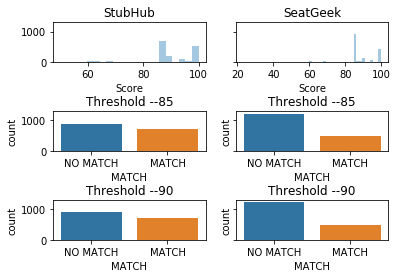

In [6]:
#Plot matches and scores
fig, axs = plt.subplots(3,2,sharey=True)

ax1=sns.distplot(sh_venue_score85['Score'],kde=False,ax=axs[0,0])
ax1.title.set_text('StubHub')
ax2=sns.distplot(sg_venue_score85['Score'],kde=False,ax=axs[0,1])
ax2.title.set_text('SeatGeek')

ax3=sns.countplot(x='MATCH', data=sh_venue_score85,ax=axs[1,0])
ax3.title.set_text('Threshold --85')

ax4=sns.countplot(x='MATCH', data=sg_venue_score85,ax=axs[1,1])
ax4.title.set_text('Threshold --85')


ax5=sns.countplot(x='MATCH', data=sh_venue_score,ax=axs[2,0])
ax5.title.set_text('Threshold --90')

ax6=sns.countplot(x='MATCH', data=sg_venue_score,ax=axs[2,1])
ax6.title.set_text('Threshold --90')

plt.subplots_adjust(hspace=1.25)
